In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import csv
import pandas as pd

from matplotlib import rc
rc('text', usetex=True)

In [116]:
plt.tight_layout()
def plot_bar(data, fname='', ylabel = '', legend=True):
    line_opt=dict(linewidth=3, markersize=12)
    fig = plt.figure(figsize=(20, 14))
    axes = fig.add_subplot(1, 1, 1)
    marker_list=["o", "v", "s", "D", "x", "*"]
    
#     axes.set_xlim(xmin * inc_factor, xmax * inc_factor)
    axes.set_ylim(10, 23)
#     axes.set_xlim(-1, len(x))
#     axes.set_yscale("log")
    
    axes.spines['right'].set_color('black')
    axes.spines['top'].set_color('black')
    axes.spines['left'].set_color('black')
    axes.spines['bottom'].set_color('black')
    
    axes.spines['right'].set_linewidth(3)
    axes.spines['top'].set_linewidth(3)
    axes.spines['left'].set_linewidth(3)
    axes.spines['bottom'].set_linewidth(3)
    
    axes.tick_params(labelsize=30)
    
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            axes.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=25)

    iter_ =4
    width = 0.2
    x = np.arange(iter_)
    labels = ["ST", "noisy ST (noise)", "noisy ST (paraphrase)"]
    color_set = [["green", "lightgreen"], ["dodgerblue", "skyblue"], ["red", "coral"]]
    offsets = [-width, 0, width]
    def plot_common(data_, x, label, colors):
        pseudo = [data_[j * 2] for j in range(iter_)]
        ft = [data_[j*2+1] for j in range(iter_)]
        pseudo = [min(xx, yy) for xx, yy in zip(pseudo, ft)]
        rects1 = axes.bar(x, ft, width, label="{}{}".format(label, ": fine-tune"), color=colors[1])
        rects2 = axes.bar(x, pseudo, width, label="{}{}".format(label, ": pseudo-training"), color=colors[0])
        autolabel(rects1)
        
    print(data)
    for i in range(3):
        plot_common(data[i], x+offsets[i], label=labels[i], colors=color_set[i])
        
#     axes.set_ylim(10, 22)
    axes.set_xticks(range(iter_))
    xticklabel = ["iteration {}".format(i) for i in range(iter_)]
    xticklabel[0] = "baseline"
    axes.set_xticklabels(xticklabel)
#     axes.legend(loc='upper right', prop={'size': 20})
    axes.legend(prop={'size': 20})
#     axes.set_xlabel('iteration', fontsize=25)
#     axes.set_ylabel(ylabel, fontsize=25)
    
    if fname != '':
        fig.savefig(fname, bbox_inches='tight')
    
    plt.show()

<Figure size 432x288 with 0 Axes>

In [102]:
def read_csv(fname):
    res = []
    with open(fname, newline="") as fin:
        csvreader = csv.reader(fin, delimiter=',')
        for row in csvreader:
            row = [round(float(x), 1) for x in row] 
            res.append(row)
    
    return res

In [104]:
res = read_csv("results.csv")

[[15.6, 15.6, 16.8, 17.9, 18.3, 18.6, 19.1, 18.7], [15.6, 15.6, 16.6, 19.3, 19.6, 21.1, 20.4, 21.4], [15.6, 15.6, 17.8, 20.4, 20.6, 21.4, 20.8, 21.8]]


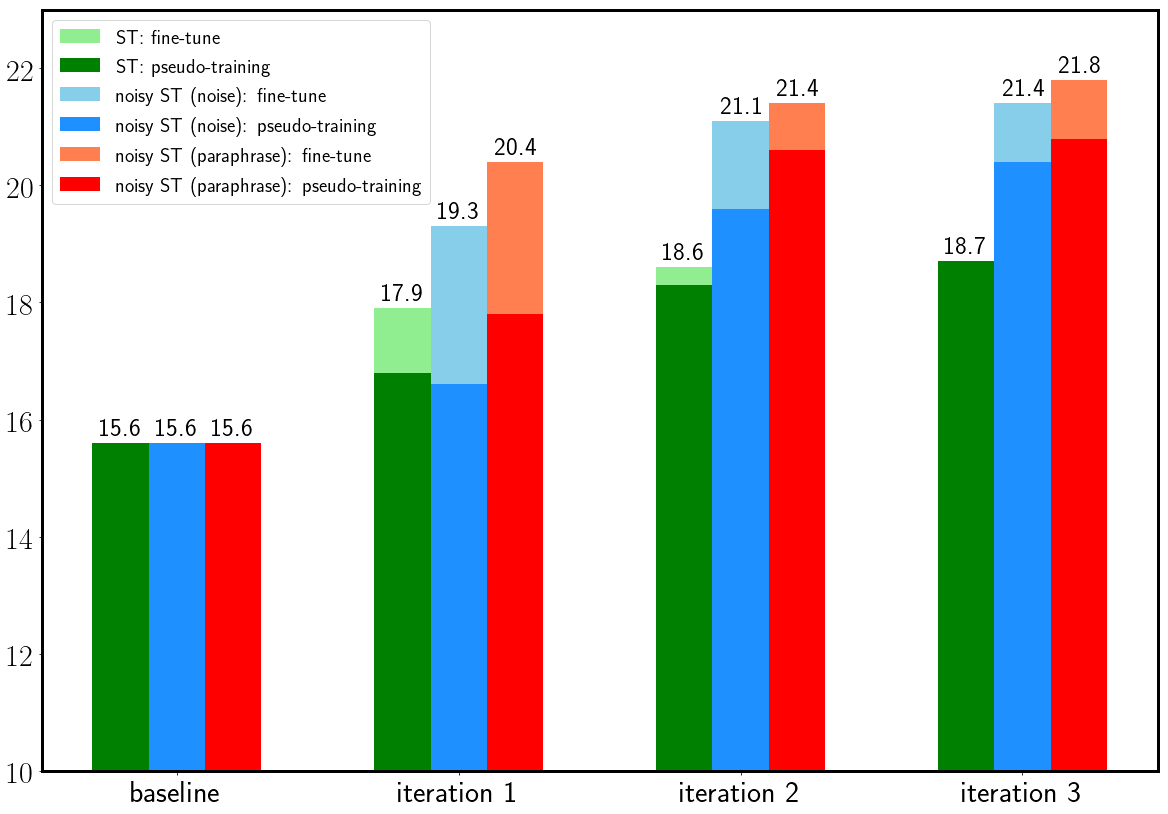

In [117]:
plot_bar(res, fname="bar.pdf")